<a href="https://colab.research.google.com/github/vfrantc/trans_experiments/blob/main/play_with_star_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
from scipy.signal import convolve
from scipy.sparse import spdiags
import torch

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
def norm(a):
  return np.sqrt(np.sum(a**2))

In [ ]:
def convbox(I, r):
    f = np.ones((1, 2*r+1))
    f = f / sum(f.ravel())
    J = np.pad(I, [(r, r), (r, r)], 'edge')
    J = scipy.signal.convolve(J, f, mode='valid', method='auto')
    J = scipy.signal.convolve(J, f.T, mode='valid', method='auto')
    return J

In [ ]:
def solveLinearSystem(s, ir, uvx, uvy, alphabet, b=0, lmbd=0, method='pcg'):
    h, w = s.shape[:2]
    hw = h * w

    # calculate the five-point positive definite Laplacian matrix
    uvx = uvx.ravel()
    uvy = uvy.ravel()
    
    # check how this padarray does work in matlab
    ux = np.padarray(uvx, h, 'pre')
    ux = ux[:-h]
    uy = np.padarray(uvy, 1, 'pre')
    uy = uy[:-1]
    D = uvx + ux + uvy + uy
    # what is spdiags in the matlab
    T = np.spdiags([-uvx, -uvy],[-h,-1],hw,hw)
    # calculate the variable of linear system
    MN = T + T.T + spdiags(D, 0, hw, hw);               # M in Eq.(12) or N in Eq.(13)    
    ir2 = ir**2                                         # R^{T}R in Eq.(12) or I^{T}I in Eq.(13)
    ir2 = np.spdiags(ir2(:),0,hw,hw)
    DEN = ir2 + alphabet * MN + lmbd * np.speye(hw, hw) # denominator in Eq.(12) or Eq.(13)
    NUM = ir.*s + lmbd * b                              # numerator in Eq.(12) or Eq.(13) 
    L = ichol(DEN,struct('michol','on'))
    [dst,~] = pcg(DEN, NUM(:), 0.01, 40, L, L.T) 
    dst = np.reshape(dst, (h, w))
    return dst

SyntaxError: invalid syntax (1815442573.py, line 20)

In [ ]:
alpha=0.001
beta=0.0001
pI=1.5
pR=0.5
varreps = 0.01
r = 3
K=20
debug=True
eps = 0.000001

In [ ]:
src = cv2.imread('001.png', 1)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
src = src.astype(np.float64) / 256
src = rgb2hsv(src)
src = src[:, :, 2]
S = src

In [ ]:
I=S           
R=np.ones_like(S)

In [ ]:
print(I.shape, R.shape)

(456, 640) (456, 640)


In [ ]:
preI = I
preR = R

In [ ]:
I = S / R

(456, 640)


([], [])

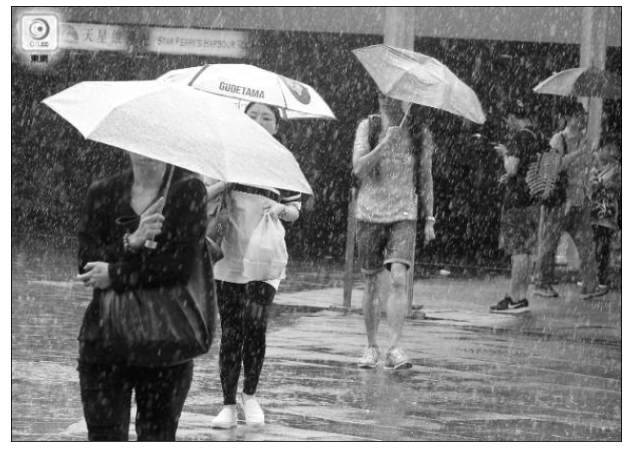

In [ ]:
print(I.shape)
plt.figure(figsize=(16, 8))
plt.imshow(I, cmap='gray')
plt.xticks([])
plt.yticks([])


In [ ]:
Ix = np.diff(I, n=1, axis=1)
Ix = np.pad(Ix, [(0, 0), (0, 1)], 'edge')
Iy = np.diff(I, n=1, axis=0);                
Iy = np.pad(Iy, [(0, 1), (0, 0)], 'edge');

(456, 640)


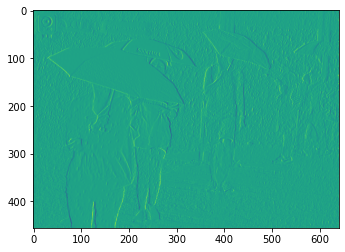

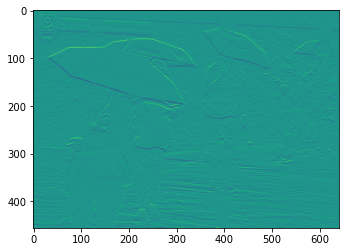

In [ ]:
print(Ix.shape)
plt.figure()
plt.imshow(Ix)
plt.show()

plt.figure()
plt.imshow(Iy)
plt.show()

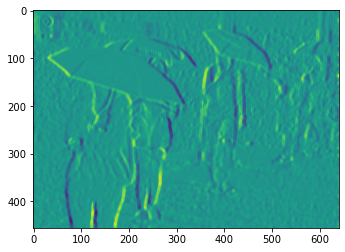

In [ ]:
avgIx=convbox(Ix, r)
plt.figure()
plt.imshow(avgIx)
plt.show()

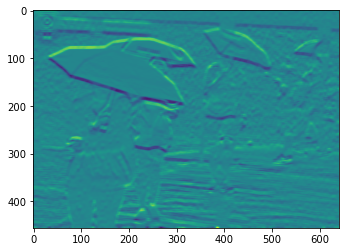

In [ ]:
avgIy=convbox(Iy, r)
plt.figure()
plt.imshow(avgIy)
plt.show()

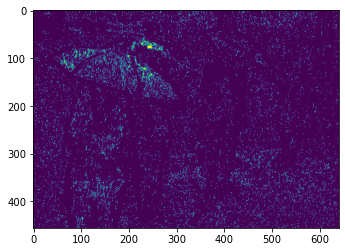

In [ ]:
ux = np.maximum(np.abs(avgIx)**pI,eps)**(-1)
plt.figure()
plt.imshow(ux)
plt.show()

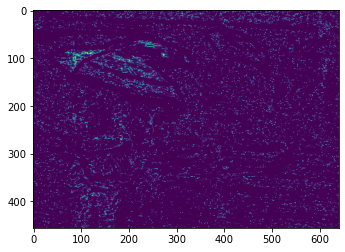

In [ ]:
uy = np.maximum(np.abs(avgIy)**pI,eps)**(-1)
plt.figure()
plt.imshow(uy)
plt.show()

In [ ]:
ux[:,-1] = 0

In [ ]:
uy[-1,:] = 0

In [ ]:
s = S
ir = R
uvx = ux
uvy = uy

In [ ]:
h, w = s.shape[:2]
hw = h * w

In [ ]:
uvx = uvx.ravel()
uvy = uvy.ravel()
ux = np.pad()

In [ ]:

    # calculate the five-point positive definite Laplacian matrix

    
    # check how this padarray does work in matlab
    ux = np.padarray(uvx, h, 'pre')
    ux = ux[:-h]
    uy = np.padarray(uvy, 1, 'pre')
    uy = uy[:-1]
    D = uvx + ux + uvy + uy
    # what is spdiags in the matlab
    T = np.spdiags([-uvx, -uvy],[-h,-1],hw,hw)
    # calculate the variable of linear system
    MN = T + T.T + spdiags(D, 0, hw, hw);               # M in Eq.(12) or N in Eq.(13)    
    ir2 = ir**2                                         # R^{T}R in Eq.(12) or I^{T}I in Eq.(13)
    ir2 = np.spdiags(ir2(:),0,hw,hw)
    DEN = ir2 + alphabet * MN + lmbd * np.speye(hw, hw) # denominator in Eq.(12) or Eq.(13)
    NUM = ir.*s + lmbd * b                              # numerator in Eq.(12) or Eq.(13) 
    L = ichol(DEN,struct('michol','on'))
    [dst,~] = pcg(DEN, NUM(:), 0.01, 40, L, L.T) 
    dst = np.reshape(dst, (h, w))

In [ ]:
I = solveLinearSystem(S, R, ux, uy, alpha)

NameError: name 'solveLinearSystem' is not defined

In [ ]:
eplisonI = np.linalg.norm(I-preI, 'fro')/npnorm(preI, 'fro');

In [ ]:
% it seems to be unnecessary, it gets reinitialized immediately
I=S;             % initialize I_0 % initialize the iterations, initialize Illumination with the value = S
R=ones(size(S)); % initialize R_0 % R -> reflection, start with all the ones
% 
if debug == true
    fprintf('-- Stop iteration until eplison < %02f or K > %d\n', vareps, K);
end
for iter = 1:K % for maximum of 20 values
    preI=I; % take the previous value of the illumination
    preR=R; % reflection map -> the best one
    
    %% algorithm for P1
    %pI=max(pI,pR);, estimation for the P1 - it's not clear what it is
    I=S./R;                             % I=S./R take the current I as the source image devided by estimated reflection. In python simple devision
    Ix = diff(I,1,2);                   % Estimate diff on the x-axis
    Ix = padarray(Ix, [0 1], 'post');   % Post ->
    Iy = diff(I,1,1);                   % 
    Iy = padarray(Iy, [1 0], 'post');   % 
    avgIx=convBox( single(Ix), r);      % so convbox should be a specific thing?? r - is 
    avgIy=convBox( single(Iy), r);
    ux = max(abs(avgIx).^pI,eps).^(-1);  % structure map avgIx.^pI > avgIx.*Ix > Ix.^2
    uy = max(abs(avgIy).^pI,eps).^(-1);  % structure map
    ux(:,end) = 0;
    uy(end,:) = 0;
    
    I = solveLinearSystem(S, R, ux, uy, alpha);  % Eq.(12)
    eplisonI = norm(I-preI, 'fro')/norm(preI, 'fro');   % iterative error of I
    
    %% algorithm for P2
    %pR=min(pI,pR);
    R=S./I;
    Rx = diff(R,1,2); Rx = padarray(Rx, [0 1], 'post');
    Ry = diff(R,1,1); Ry = padarray(Ry, [1 0], 'post');
    avgRx=convBox( single(Rx), r);
    avgRy=convBox( single(Ry), r);
    vx = max(abs(avgRx).^pR,eps).^(-1);  % texture map
    vy = max(abs(avgRy).^pR,eps).^(-1);  % texture map
    vx(:,end) = 0;
    vy(end,:) = 0;
    
    R = solveLinearSystem(S, I, vx, vy, beta);            	% Eq.(13)
    eplisonR = norm(R-preR, 'fro')/norm(preR, 'fro');   % iterative error of R
    
6
    if(eplisonI<vareps||eplisonR<vareps)
        break;
    end
end
I(I<0)=0;
R(R<0)=0;
end